In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

data_07 = pd.read_csv(
    'orbit/Orbit-e0.7.txt', 
    delimiter= '\s+', 
    skiprows=[0,1,2,3,4,5,6,7,8,9],
    names=["t (yr)", "r (AU)", "theta (deg)", "x (AU)", "y (AU)"]
)

data_00 = pd.read_csv(
    'orbit/Orbit-e0.0.txt', 
    delimiter= '\s+', 
    skiprows=[0,1,2,3,4,5,6,7,8,9],
    names=["t (yr)", "r (AU)", "theta (deg)", "x (AU)", "y (AU)"]
)

data_05 = pd.read_csv(
    'orbit/Orbit-e0.5.txt', 
    delimiter= '\s+', 
    skiprows=[0,1,2,3,4,5,6,7,8,9],
    names=["t (yr)", "r (AU)", "theta (deg)", "x (AU)", "y (AU)"]
)

data_00

,t (yr),r (AU),theta (deg),x (AU),y (AU)
0,0.000,6.22,0.0,6.220,0.000
1,0.076,6.22,1.8,6.217,0.195
2,0.151,6.22,3.6,6.208,0.391
3,0.227,6.22,5.4,6.192,0.585
4,0.303,6.22,7.2,6.171,0.780
...,...,...,...,...,...
196,14.835,6.22,352.8,6.171,-0.780
197,14.911,6.22,354.6,6.192,-0.585
198,14.986,6.22,356.4,6.208,-0.391
199,15.062,6.22,358.2,6.217,-0.195


$$b^2 = a^2 (1 - e^2)$$

$$b = \sqrt{a^2 (1 - e^2)}$$

In [312]:
def make_plot(data, e):
    """
    Plot orbital data for the given eccentricity.
    """
    # planet distance at periastron (AU)
    a = 6.22
    q = a * (1 - e)
    
    xmin = np.min(data['x (AU)'])
    xmax = np.max(data['x (AU)'])
    ymin = np.min(data['y (AU)'])
    ymax = np.max(data['y (AU)'])
    rmin = np.min(data['r (AU)'])
    
    xsize = abs(xmax - xmin)
    ysize = abs(ymax - ymin)

    xpos = xmax - rmin
    
    ax = data.plot.scatter(x='x (AU)', y='y (AU)',  
                           figsize=(xsize, ysize)
                          )
    plt.plot(xpos, 0, 'ro', markersize=10)
    ax.set_title('Exoplanet system with eccentricity of ' + str(e), fontsize=20)
    ax.set_xlabel('x position (AU)', fontsize=16)
    ax.set_ylabel('y position (AU)', fontsize=16)
    plt.legend(['Star position', 'Orbital positions of exoplanet'], loc='lower right', fontsize=10)
    plt.show()

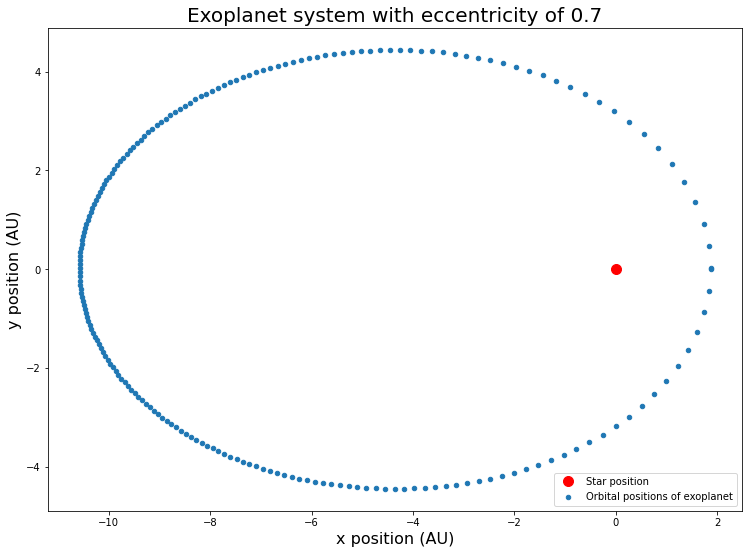

In [313]:
make_plot(data_07, 0.7)

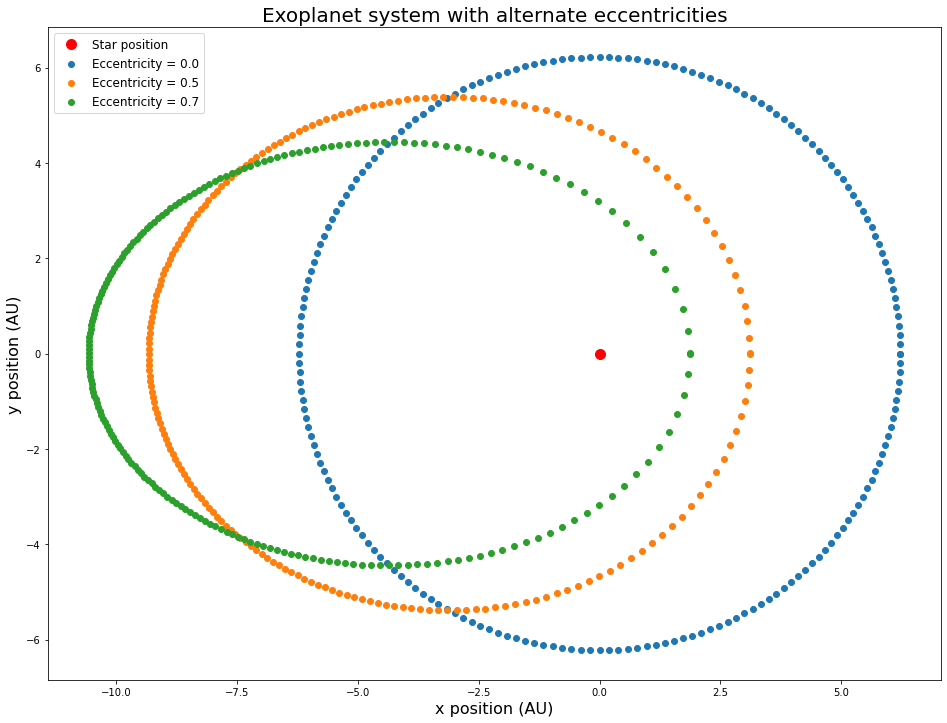

In [314]:
a = 6.22
q = a * (1 - e)

xmin = np.min(data_00['x (AU)'])
xmax = np.max(data_00['x (AU)'])
ymin = np.min(data_00['y (AU)'])
ymax = np.max(data_00['y (AU)'])
rmin = np.min(data_00['r (AU)'])

xsize = abs(xmax - xmin)
ysize = abs(ymax - ymin)

xpos = xmax - rmin

# plt.figure(figsize=(xsize, ysize))
plt.figure(figsize=(16, 12))

plt.scatter(x=data_00['x (AU)'], y=data_00['y (AU)'], label='Eccentricity = 0.0')
plt.scatter(x=data_05['x (AU)'], y=data_05['y (AU)'], label='Eccentricity = 0.5')
plt.scatter(x=data_07['x (AU)'], y=data_07['y (AU)'], label='Eccentricity = 0.7')

plt.plot(xpos, 0, 'ro', markersize=10, label='Star position')
plt.title('Exoplanet system with alternate eccentricities', fontsize=20)
plt.xlabel('x position (AU)', fontsize=16)
plt.ylabel('y position (AU)', fontsize=16)

plt.legend(loc='upper left', fontsize=12)
plt.show()